In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
import plotly.express as px
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import time
import h5py
import pickle
import csv

In [2]:
df = pd.read_csv("/Users/jpate/Downloads/netflix_titles.csv")

In [3]:
df = df.dropna(axis = 0)

In [4]:
type1 = {'Movie':0, 'TV Show':1}
df.replace({'type': type1}, inplace=True)

In [5]:
df = df[df["release_year"]>=2000]

<AxesSubplot:>

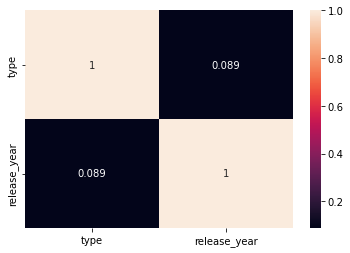

In [6]:
sns.heatmap(df.corr(),annot = True)

In [7]:
df = df[(df["rating"] != "NC-17") & (df["rating"] != "UR") & (df["rating"] != "TV-Y7-FV")]

In [8]:
type1 = {'TV-MA':0, 'TV-14':1, 'R':3, 'PG-13':4,'TV-PG':5, 'PG':6,'TV-G':7, 'TV-Y7':8,'TV-Y':7, 'NR':8, 'G':9 }
df.replace({'rating': type1}, inplace=True)

<AxesSubplot:xlabel='rating', ylabel='count'>

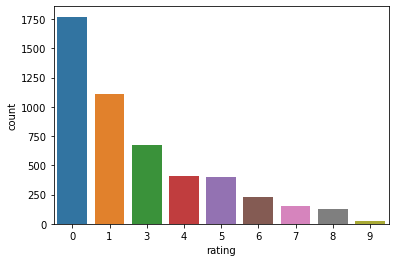

In [9]:
sns.countplot(x = df.rating, data = df)

In [10]:
tvdata = df[df["type"] == 1]

In [11]:
moviedata = df[df["type"] == 0]

In [12]:
moviedata["duration"] = moviedata["duration"].str.replace("min","")

/var/folders/tw/zw6t1r65653627d6yhcc6pt80000gn/T/ipykernel_14559/1563222211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata["duration"] = moviedata["duration"].str.replace("min","")


In [13]:
moviedata["duration"] = moviedata["duration"].astype(int)

/var/folders/tw/zw6t1r65653627d6yhcc6pt80000gn/T/ipykernel_14559/1889546806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata["duration"] = moviedata["duration"].astype(int)


In [15]:
moviedata['lengthbins'] = pd.cut(x=moviedata['duration'], bins=[0,20,40, 60, 80,120,
                                           140,160,180, 200, 220],
                      labels=['20-40',"41-60",'61-80','81-100','101-120','121-140', '141-160', '161-180', 
                              '181-200','201-220'])

/var/folders/tw/zw6t1r65653627d6yhcc6pt80000gn/T/ipykernel_14559/1117683498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata['lengthbins'] = pd.cut(x=moviedata['duration'], bins=[0,20,40, 60, 80,120,


<AxesSubplot:xlabel='lengthbins', ylabel='count'>

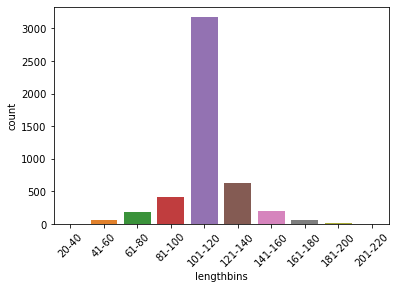

In [16]:
plt.xticks(rotation = 45)
sns.countplot(x = "lengthbins", data = moviedata)

In [17]:
df = df.reset_index(drop=True)

In [18]:
df_titles = df.copy()

In [19]:
df_titles = df_titles.drop(['show_id','director','cast','country','date_added', 'release_year','type','rating','duration','listed_in','description'], axis=1)

In [20]:
titles = df_titles.to_dict()

In [21]:
titles = titles['title']

In [22]:
nlp = spacy.load('en_core_web_lg')

In [23]:
sim = {}

In [24]:
def func():
    for i, row in df.iterrows():
        doc = nlp(row['description'])
        #similarities[i] = {}
        sim[i]={}
#     print(row['title'])
        for j, row2 in df.iterrows():
            doc2 = nlp(row2['description'])
        #print(f"{row['title']} x {row2['title']}: {doc.similarity(doc2):.10f}")
        #similarities[i][j] = doc.similarity(doc2)
            sim[i][j] = doc.similarity(doc2)

In [25]:
def lookup_by_title(title):
    for title_id in titles:
        if titles[title_id] == title:
            return title_id
    return None

In [26]:
def lookup(title1, title2):
    return similarities[lookup_by_title(title1)][lookup_by_title(title2)]

In [370]:
import pickle

# define dictionary

# create a binary pickle file 
f = open("dict.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(new_dict,f)

# close file
f.close()

In [27]:
infile = open('dict.pkl','rb')
similarities = pickle.load(infile)
infile.close()

In [28]:
func()

KeyboardInterrupt: 

In [29]:
from heapq import nlargest
def recommend(item_title):
    six_largest = nlargest(6, 
                            similarities[lookup_by_title(item_title)], 
                            key=similarities[lookup_by_title(item_title)].get)
    six_largest.pop(0)
    for x in six_largest:
        print(titles[x])

In [30]:
recommend('The Great British Baking Show')

Shopkins: Chef Club
Belgica
Tune in for Love
Berlin Calling
Maacher Jhol
